Antes de sumergirnos en cómo rellenar los valores ausentes, necesitamos un momento para analizar los dos tipos de variables con las que trabajarás como profesional de datos: cuantitativas y categóricas.

Variables cuantitativas vs. categóricas

Las variables cuantitativas tienen valores numéricos que podemos usar para cálculos aritméticos, por ejemplo, la altura, el peso, la edad y los ingresos. En Python, estos valores tienden a almacenarse como números enteros o flotantes.

Las variables categóricas representan un conjunto de valores posibles que puede tener una observación particular, por ejemplo, el color, la marca y el modelo de un automóvil. En Python, estos valores tienden a almacenarse como cadenas, pero también pueden ser valores booleanos o incluso números enteros.

Algunos ejemplos de valores categóricos enteros son códigos postales o etiquetas numéricas que representan otros valores (por ejemplo, 1 = rojo, 2 = azul, etc.). En cualquier caso, no tiene sentido realizar operaciones aritméticas con valores categóricos. 

La forma en que rellenamos los valores ausentes depende de si son cuantitativos o categóricos.

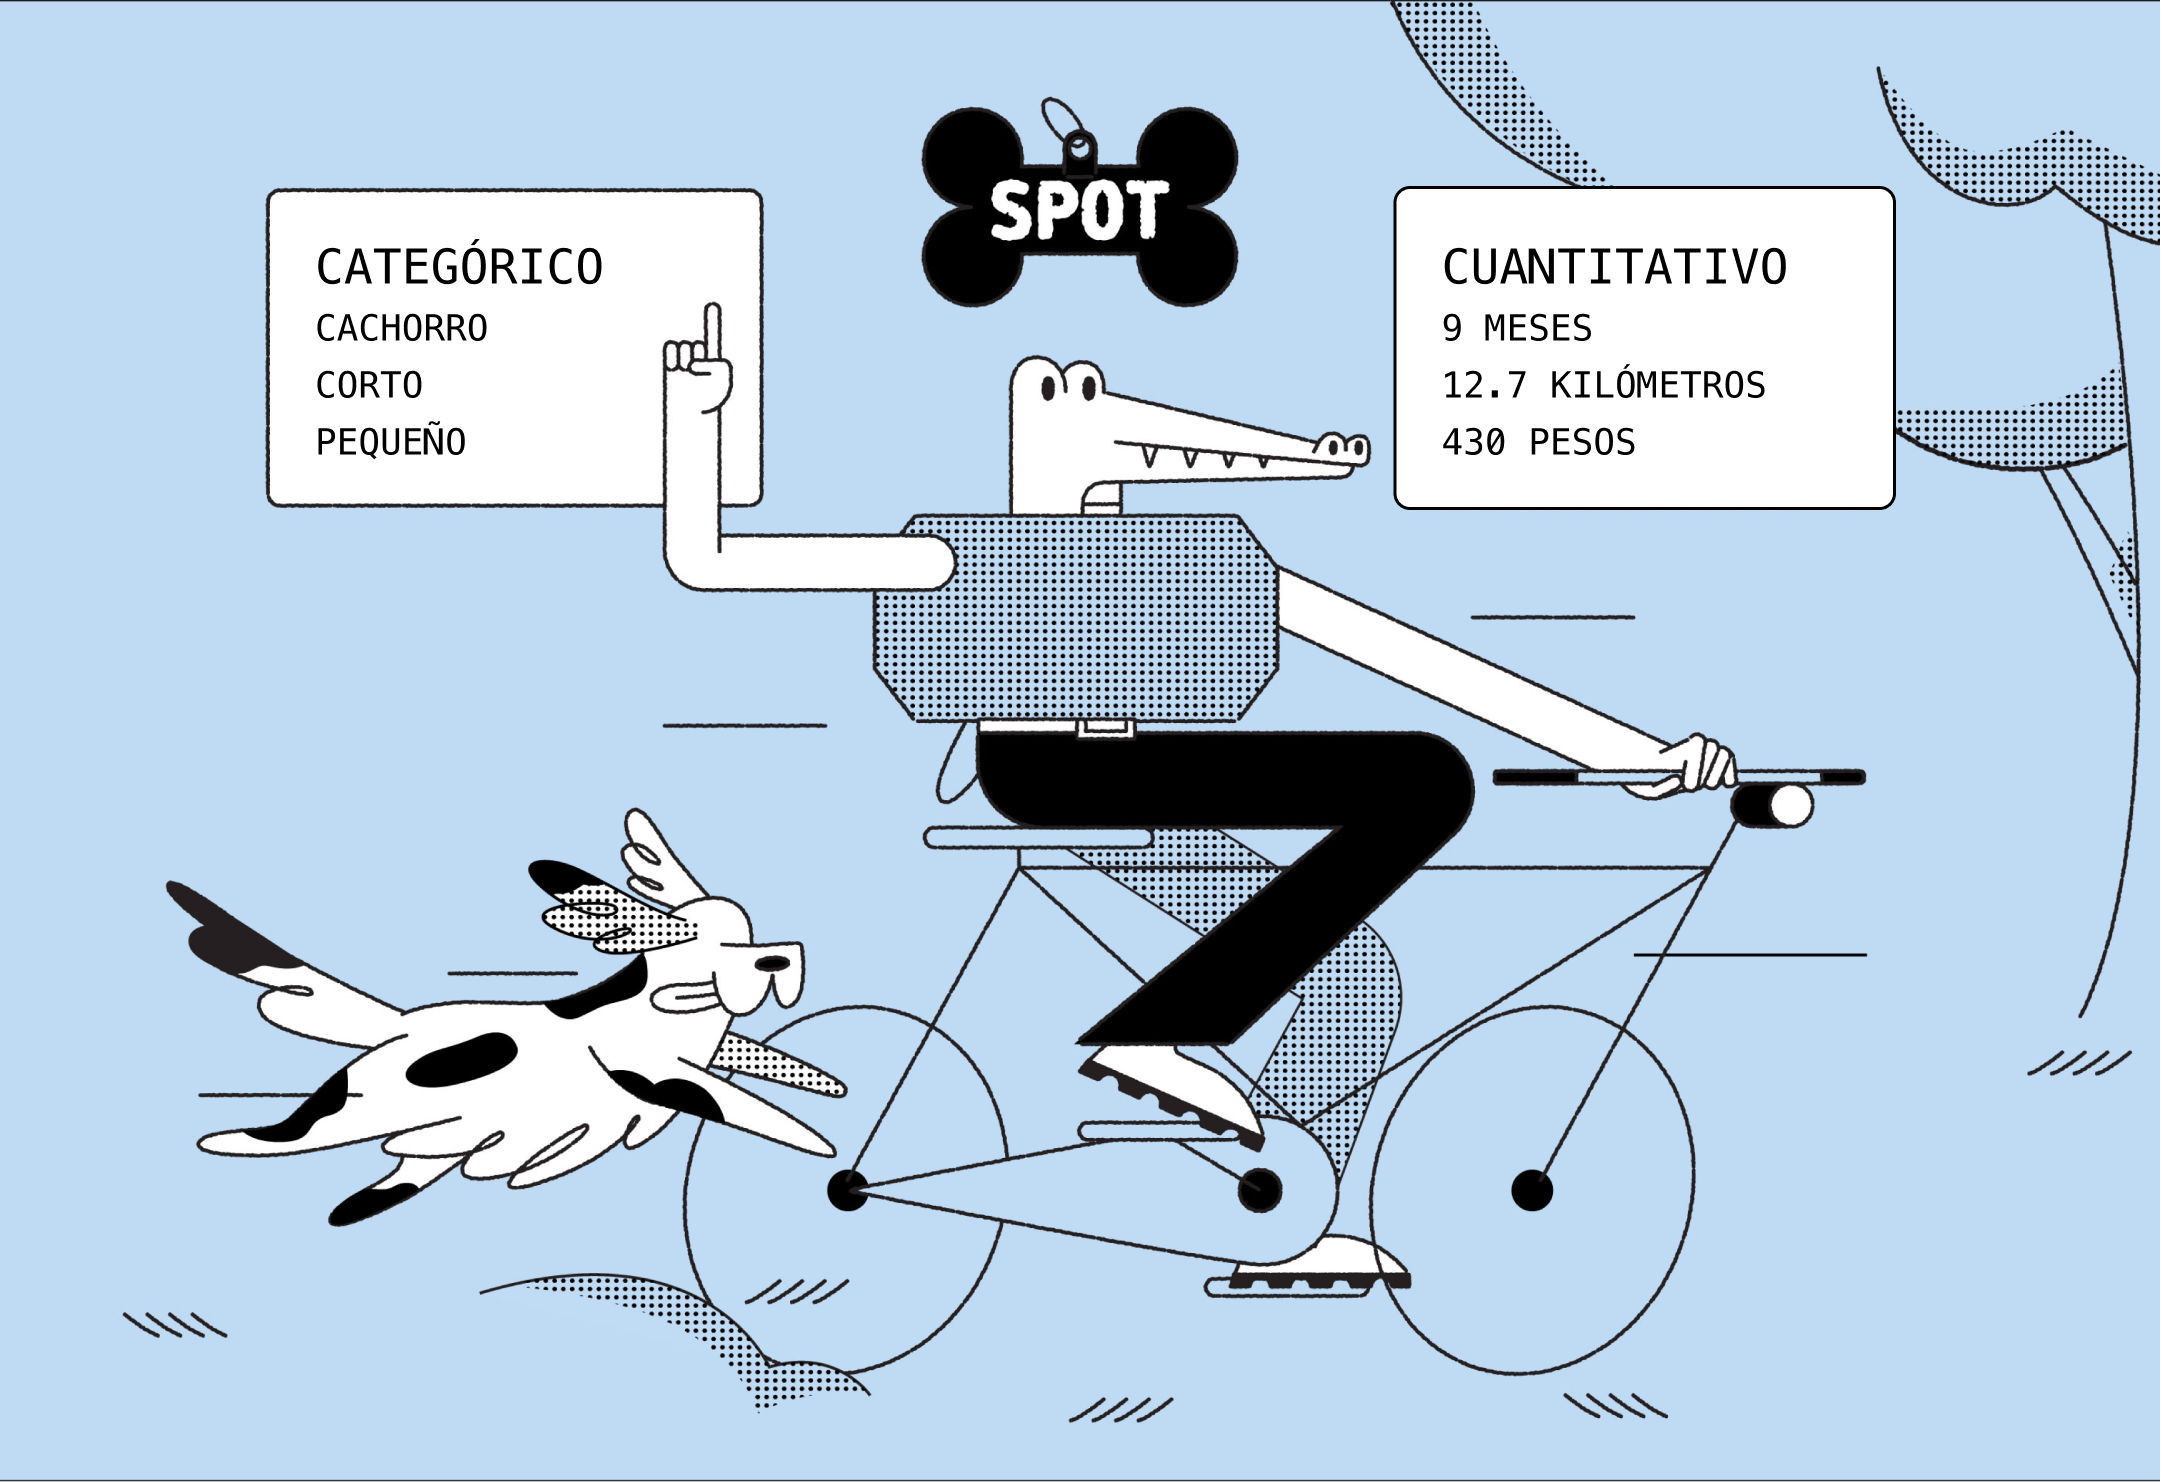

Quantitative variables are used to represent amounts, while categorical variables are used to represent groups: 

Quantitative variables

These variables have numerical values that represent measurements or counts. They have consistent intervals and magnitudes that can be placed in a meaningful order. Examples of quantitative variables include age, height, and weight.

Categorical variables

These variables have values that represent categories or labels that place an individual into a group. The categories are mutually exclusive, meaning each observation can only be placed in one category. Examples of categorical variables include rankings, classifications, and binary outcomes.

Pregunta

En la última lección determinamos que en nuestras columnas de dirección de correo electrónico y fuente de tráfico hay valores NaN. ¿Qué tipo de variables son estas columnas?

Tanto 'source' como 'email' son variables cuantitativas.

'source' es categórica y 'email' es cuantitativa.

'source' es cuantitativa y 'email' es categórica.

*Tanto 'source' como 'email' son categóricas.
Así es, ambas son categóricas.

¡Perfecto!

Tanto 'source' como 'email' son columnas categóricas. De hecho, cada columna en el conjunto de datos de fuente de tráfico es categórica. En esta lección aprenderemos algunas formas efectivas de rellenar los valores categóricos ausentes.

Pregunta

Acuérdate del sprint de Python básico. Allí aprendimos un método para sustituir NaN por un valor de nuestra elección. ¿Recuerdas cuál era? Escribe tu respuesta sin punto al principio pero con paréntesis al final.

fillna()
El método fillna() reemplaza NaN en el conjunto de datos con el valor que introducimos dentro del paréntesis.

¡Lo has entendido bien!

Pregunta

Recuerda que nuestro conjunto de datos tiene 200 000 filas y 186 047 valores ausentes en la columna 'email'. Después de rellenar los valores ausentes con la cadena vacía '', ¿cuántos valores no nulos encontrará info() para la columna 'email'?

*200,000
¡Correcto!, info() solo reconoce NaN y None como valores nulos.

0

186,047

13,953

¡Lo has entendido bien!

Usar fillna() no es la única forma en que podemos rellenar los valores ausentes con cadenas vacías. Por cierto, también podemos hacerlo directamente al leer los datos mediante read_csv().

El parámetro keep_default_na=

Si observas los datos de texto sin procesar en el archivo visit_log.csv, encontrarás que los valores ausentes están representados por la ausencia de texto. En otras palabras, la ausencia de texto en visit_log.csv se interpreta como NaN. Consulta el archivo CSV en la pestaña de la lección.

Pero podemos hacer que read_csv() lea la ausencia de texto como cadenas vacías en lugar de NaN, configurando el parámetro keep_default_na= en False. Probémoslo en nuestro conjunto de datos:

import pandas as pd

df_logs = pd.read_csv('/datasets/visit_log.csv', keep_default_na=False)

print(df_logs.head())
print()
df_logs.info()

      user_id   source       email  purchase
0  7141786820    other                     0
1  5644686960    email  c129aa540a         0
2  1914055396  context                     0
3  4099355752    other                     0
4  6032477554  context                     1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   user_id   200000 non-null  int64 
 1   source    200000 non-null  object
 2   email     200000 non-null  object
 3   purchase  200000 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 6.1+ MB

En la impresión podemos ver que los valores ausentes son strings vacíos. Ahora info() ya no detectará ningún valor nulo, esto significa que depende de nosotros reconocer que '' representa un valor ausente a medida que avanzamos con nuestro análisis.

Ten en cuenta que establecer keep_default_na=False convierte todos los valores ausentes en strings vacíos, incluso para las columnas numéricas. Esto hace que las columnas numéricas se lean como strings cuando tienen valores ausentes. Así que asegúrate de usar solo keep_default_na=False cuando desees que todos los valores ausentes en cada columna se lean como strings vacíos.

En el caso de visit_log.csv, nos conviene hacer esto porque todas nuestras columnas son categóricas. ¡Pudimos leer los datos y reemplazar todos los valores ausentes con tan solo una pequeña línea de código!

Pregunta

Acuérdate del sprint de Python básico. Hemos aprendido un método para sustituir un valor por otro en una columna de un DataFrame. ¿Recuerdas cuál era? Escribe tu respuesta sin punto al principio pero con paréntesis al final.

replace()

El método replace() al ser llamado en una columna de nuestro DataFrame nos permite cambiar un valor por otro. Recuerda que la sintaxis es replace(old_value, new_value).

¡Excelente trabajo!

Pregunta

Tienes un DataFrame almacenado en la variable df_logs. Quieres agrupar los datos por la columna 'source' y extraer los valores de la columna 'user_id'. ¿Cómo lo harías?

df_logs.groupby('user_id')['source']

*df_logs.groupby('source')['user_id']
Así es. Es exactamente lo que queremos.

df.groupby('source')['user_id']

¡Buen trabajo!
Pregunta

Ahora que has repasado tus conocimientos sobre la agrupación, vamos a resumir los métodos que se pueden aplicar a los datos agregados. En la prueba anterior, agrupaste los datos por la columna 'source' y extrajiste la columna 'user_id'. Ahora necesitas contar el número de repeticiones de cada valor en esa columna. ¿Cómo completarías el código para obtener este recuento?

df_logs.groupby('source')['user_id'].sum()

*df_logs.groupby('source')['user_id'].count()
Así es. Es exactamente lo que queremos.

df_logs.groupby('source')['user_id'].max()

Actividad práctica

Ejercicio 1
Para calcular la tasa de conversión de cada fuente de tráfico, primero determina cuántas visitas hubo de cada fuente.

Para encontrar el número total de visitas de cada fuente de tráfico, utiliza groupby() para agrupar los datos por la columna 'source', luego cuenta el número de valores en la columna 'user_id' del DataFrame agrupado. Asigna el resultado en la variable visits y luego imprímelo.

El precódigo ya contiene el trabajo que realizaste para rellenar los valores ausentes.

In [ ]:
import pandas as pd

df_logs = pd.read_csv('/datasets/visit_log.csv', keep_default_na=False)
df_logs['source'] = df_logs['source'].replace('', 'email')

visits = df_logs.groupby('source')['user_id'].count()# escribe tu código aquí
print(visits)# escribe tu código aquí

"""Resultado
source
context     52032
email       13953
other      133834
undef         181
Name: user_id, dtype: int64"""

Ejercicio 2

A continuación, determina el número de visitas en las que se realizó una compra para cada fuente, calculando la suma de la columna 'purchase' para cada grupo de fuente. Posteriormente, asigna los resultados a la variable purchases e imprímelos.

In [ ]:
import pandas as pd

df_logs = pd.read_csv('/datasets/visit_log.csv', keep_default_na=False)
df_logs['source'] = df_logs['source'].replace('', 'email')

purchases = df_logs.groupby('source')['purchase'].sum()# escribe tu código aquí
print(purchases)# escribe tu código aquí)

#Agrupa df_logs por 'source', luego llama a count() en la columna 
# 'purchase' y asigna el resultado a 'purchases'.

"""Resultado
source
context    3029
email      1021
other      8041
undef        12
Name: purchase, dtype: int64"""


Ejercicio 3

Calcula la tasa de conversión para cada fuente de tráfico, guarda los resultados en conversion, e imprímelos. La tasa de conversión es la proporción de visitas en las que se realizó una compra. El precódigo contiene las visitas y compras de tu trabajo previo.

In [ ]:
import pandas as pd

df_logs = pd.read_csv('/datasets/visit_log.csv', keep_default_na=False)
df_logs['source'] = df_logs['source'].replace('', 'email')

visits = df_logs.groupby('source')['user_id'].count()
purchases = df_logs.groupby('source')['purchase'].sum()

conversion = purchases / visits# divide el número de compras entre el número de visitas
print(conversion)# escribe tu código aquí)

"""Resultado
source
context    0.058214
email      0.073174
other      0.060082
undef      0.066298
dtype: float64"""